

> **MEDILEAF**



In [ ]:
!pip install tensorflow==2.8.0rc0

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing neccessary libraries
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Defining paths to the training and validation data directories
train_data_dir = "/content/drive/MyDrive/DataSet/TrainDataSet"
val_data_dir = "/content/drive/MyDrive/DataSet/TestDataSet"
# Create an ImageDataGenerator for data augmentation during training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,                  # Rescale pixel values to [0,1]
    rotation_range=30,                # Rotate images randomly by up to 30 degrees
    width_shift_range=0.2,            # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,           # Shift images vertically by up to 20% of the height
    shear_range=0.2,                  # Apply shear transformations
    zoom_range=0.2,                   # Zoom in randomly by up to 20%
    horizontal_flip=True,             # Flip images horizontally
    fill_mode='nearest'               # Fill in newly created pixels after rotation or shifting
    )

# Create an ImageDataGenerator for validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Define batch size
batch_size = 32

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,                  # Path to the training data directory
    target_size=(224, 224),          # Resize images to 224x224 pixels
    batch_size=batch_size,           # Number of samples per batch
    class_mode='categorical'         # Type of label array to return (categorical for one-hot encoding)
)

# Generate batches of validation data (no augmentation)
val_generator = val_datagen.flow_from_directory(
    val_data_dir,                    # Path to the validation data directory
    target_size=(224, 224),          # Resize images to 224x224 pixels
    batch_size=batch_size,           # Number of samples per batch
    class_mode='categorical'         # Type of label array to return (categorical for one-hot encoding)
)

Found 323 images belonging to 6 classes.
Found 137 images belonging to 6 classes.


In [ ]:

# Define the class names for your classification task
class_names=['Alovera','Guava','Hibiscus','Neem','Papaya','Tulsi']
num_classes = len(class_names)  # Count the number of classes

# Load the ResNet50V2 model with pre-trained weights, excluding the top classification layers
base_model=tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False)

# Build the top classification layers on top of the ResNet50V2 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = Dense (1024, activation ='relu')(x)  # Add a fully connected layer with ReLU activation
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for classification
model = Model(inputs=base_model.input, outputs=predictions)  # Define the final model with input and output layers

# Freeze the weights of the base ResNet50V2 layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model with Adam optimizer, a learning rate of 0.0001,
# categorical crossentropy loss function, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs for training
num_epochs = 25

# Train the model using the training generator and validate it using the validation generator
# Set the number of steps per epoch and validation steps based on the batch size
history = model.fit(
    train_generator,                                          # Training data generator
    steps_per_epoch=train_generator.samples // batch_size,   # Number of steps per epoch
    validation_data=val_generator,                            # Validation data generator
    validation_steps=val_generator.samples // batch_size,     # Number of validation steps
    epochs=num_epochs                                        # Number of epochs
)

# Compile the model again with the same configuration
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/25
10/10 [==============================] - 392s 40s/step - loss: 1.2529 - accuracy: 0.6323 - val_loss: 0.7016 - val_accuracy: 0.7969
Epoch 2/25
10/10 [==============================] - 106s 12s/step - loss: 0.4277 - accuracy: 0.9519 - val_loss: 0.3096 - val_accuracy: 0.9297
Epoch 3/25
10/10 [==============================] - 108s 11s/step - loss: 0.2399 - accuracy: 0.9759 - val_loss: 0.2579 - val_accuracy: 0.8906
Epoch 4/25
10/10 [==============================] - 103s 10s/step - loss: 0.1584 - accuracy: 0.9725 - val_loss: 0.1705 - val_accuracy: 0.9766
Epoch 5/25
10/10 [==============================] - 107s 11s/step - loss: 0.1164 - accuracy: 0.9828 - val_loss: 0.1207 - val_accuracy: 0.9844
Epoch 6/25
10/10 [==============================] - 112s 11s/step - loss: 0.0840 - accuracy: 0.9844 - val_loss: 0.1110 - val_accuracy: 0.9844
Epoch 7/25
10/10 [==============================] - 109s 11s/step - loss: 0.0623 - accuracy: 0.9931 - val_loss: 0.0961 - val_accuracy: 0.9922
Epoch 

In [ ]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Extract the training accuracy and validation accuracy from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')  # Plot training accuracy
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy')  # Set the title of the plot
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.legend()  # Add legend to the plot
plt.grid(True)  # Add gridlines to the plot
plt.show()  # Display the plot

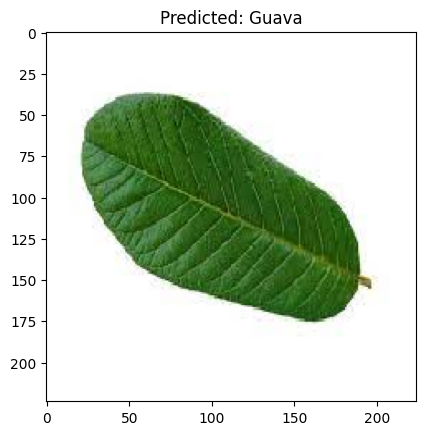

The predicted leaf name for image 1 is: Guava


In [ ]:
# Load the pre-trained model
model = keras.models.load_model('/content/drive/MyDrive/MEDLEAF2.h5')

# Compile the model with Adam optimizer, learning rate of 0.0001, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Function to classify a leaf image
def classify_leaf(input_image_array):
    # Preprocess the image
    img_array=np.expand_dims(input_image_array, axis=0)
    img_array /= 255.
    # Make predictions using the loaded model
    predictions = model.predict(img_array)
    predicted_class_index= np.argmax(predictions[0])
    predicted_leaf_name = class_names[predicted_class_index]  # Get the predicted leaf name
    return predicted_leaf_name

# Function to display an image with its prediction
def display_image_with_prediction(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = keras.preprocessing.image.img_to_array(img)
    predicted_name = classify_leaf(x)  # Get the predicted leaf name
    # Display the image and prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_name}')
    plt.show()
    return predicted_name

if __name__=="__main__":
    dir_path = "/content/drive/MyDrive/DataSet/TestDataSet"
    predicted_names = []
    # Loop through the images in the directory
    for image_filename in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_filename)
        # Display the image with its prediction
        predicted_name = display_image_with_prediction(image_path)
        predicted_names.append(predicted_name)
    # Print the predicted leaf names for each image
    for i, predicted_name in enumerate(predicted_names):
        print(f'The predicted leaf name for image {i + 1} is: {predicted_name}')
